In [18]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
import pandas as pd
import numpy as np



from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

import plotly.offline as py 
py.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns

# Fetch dataset from OpenML

In [20]:
credit_data = fetch_openml('credit-g', version=1, parser='auto')

In [21]:
X = credit_data.data
y = credit_data.target

# Data study

In [22]:
# Arrays dimensions
print(f'X shape:{X.shape}\nY shape:{y.shape}')

X shape:(1000, 20)
Y shape:(1000,)


In [23]:
display(X)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,4,real estate,31,none,own,1,unskilled resident,1,none,yes
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,4,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,4,car,38,none,own,1,skilled,1,none,yes
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,4,no known property,23,none,for free,1,skilled,1,yes,yes


In [24]:
# See some statistics
display(X.describe())

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [30]:
# See dataset info, number of columns, missing values etc..
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   int64   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   int64   
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   int64   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   int64   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   int64   
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [31]:
# Check for missing values in class
print(y.isna().sum())

0


(array(['bad', 'good'], dtype=object), array([300, 700], dtype=int64))


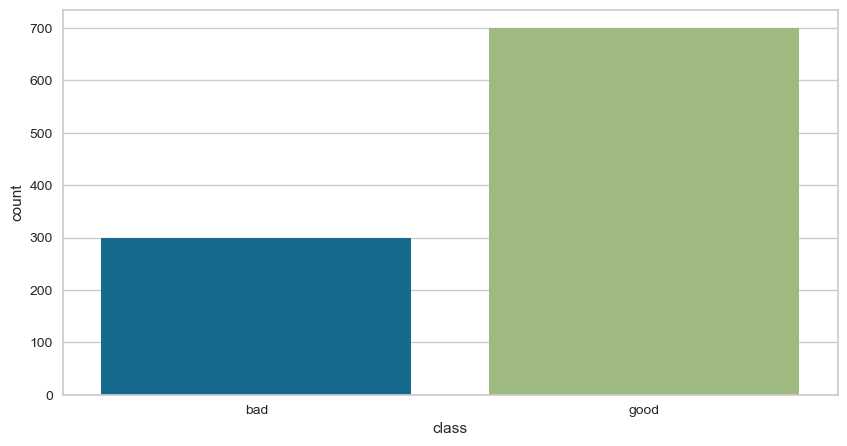

In [25]:
# Check class balance (if bad count = good count)
print(np.unique(y, return_counts=True))
plt.figure(1, figsize=(10, 5))
sns.countplot(x=y)
plt.show()

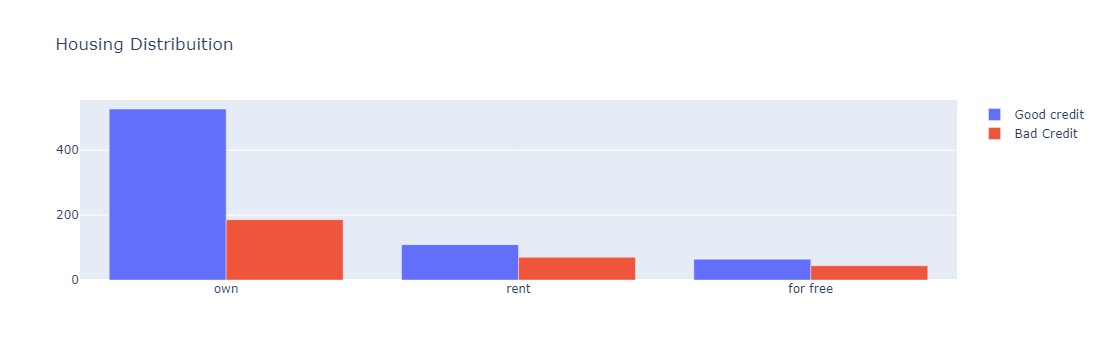

In [44]:
credit_data  = X.join(pd.DataFrame(y))

graph0 = go.Bar(
    x = credit_data[credit_data["class"]== 'good']["housing"].value_counts().index.values,
    y = credit_data[credit_data["class"]== 'good']["housing"].value_counts().values,
    name='Good credit'
)

#Second plot
graph1 = go.Bar(
    x = credit_data[credit_data["class"]== 'bad']["housing"].value_counts().index.values,
    y = credit_data[credit_data["class"]== 'bad']["housing"].value_counts().values,
    name="Bad Credit"
)

data = [graph0, graph1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

# Data processing

In [12]:
# Transform categorical values to numeric with OneHotEncoder
ct = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19])],
                      remainder='passthrough')

X = ct.fit_transform(X)

In [13]:
# Visualize transformation
display(pd.DataFrame(X))

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,48.0,5951.0,2.0,2.0,22.0,1.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,12.0,2096.0,2.0,3.0,49.0,1.0,2.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,42.0,7882.0,2.0,4.0,45.0,1.0,2.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,24.0,4870.0,3.0,4.0,53.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,12.0,1736.0,3.0,4.0,31.0,1.0,1.0
996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,30.0,3857.0,4.0,4.0,40.0,1.0,1.0
997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,12.0,804.0,4.0,4.0,38.0,1.0,1.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,45.0,1845.0,4.0,4.0,23.0,1.0,1.0


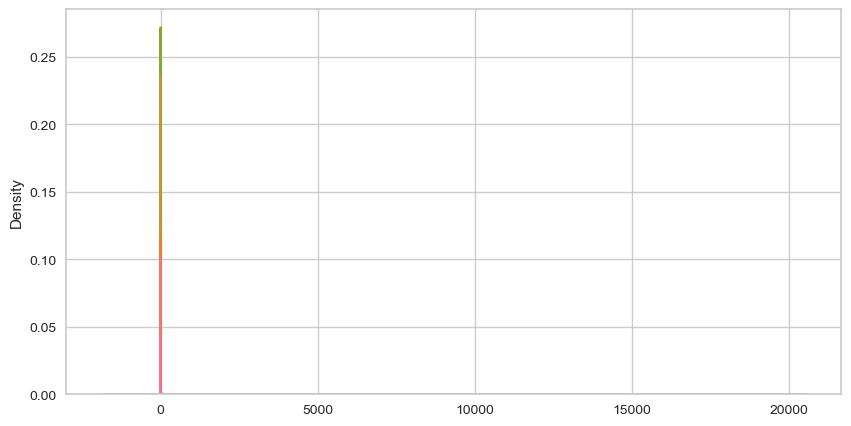

In [14]:
# Visualize data density before normalization
plt.figure(2, figsize=(10, 5))
sns.kdeplot(X, legend=None)
plt.show()

In [15]:
# Normalization with StandardScaler, (Z-SCORE method)
scaler = StandardScaler()
X_ss = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

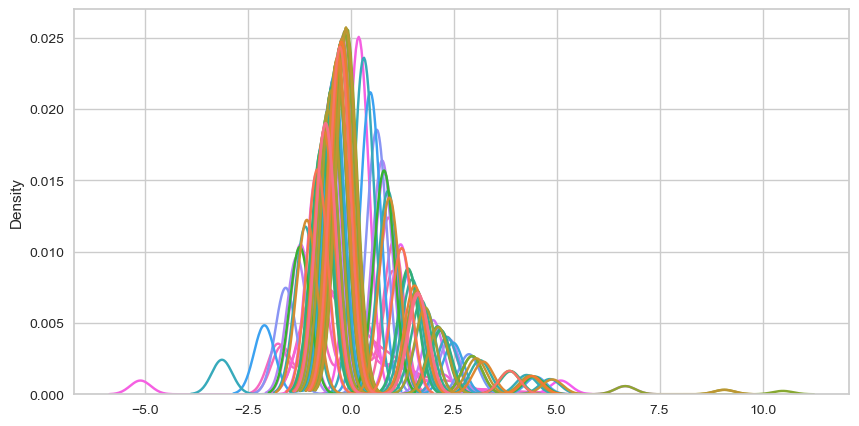

In [16]:
plt.figure(3, figsize=(10 ,5))
sns.kdeplot(X_ss, legend=None)
plt.show()

In [17]:
# Transform class, bad ->0 good ->1
df = pd.DataFrame(y)
df.replace('bad', 0, inplace=True)
df.replace('good', 1, inplace=True)
y= np.asarray(df)

# Train and test creation

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

In [19]:
# Arrays dimensions
print(f'X train:{X_train.shape}\nY train:{y_train.shape}\n\nX test:{X_test.shape}\nY test:{y_test.shape}')

X train:(800, 61)
Y train:(800, 1)

X test:(200, 61)
Y test:(200, 1)


# Testing models

In [20]:
# Testing some models
models = [('svm',SVC()),
          ('lg',LogisticRegression()),
          ('nb',GaussianNB()),
          ('nn',MLPClassifier()),
          ('knn',KNeighborsClassifier()),
          ('rforest',RandomForestClassifier())]

scoring = 'recall'
results = []
names = []
for model_name, model in models:
    kf = StratifiedKFold(5, shuffle=True, random_state=5)
    cross_results = cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring)
    results.append(cross_results)
    names.append(model_name)

In [21]:
for i in range(len(names)):
    print(f'\nName:{names[i]}->Mean recall:{results[i].mean()}\nMin recall:{min(results[i])}\nMax recall:{max(results[i])}')


Name:svm->Mean recall:0.9303571428571429
Min recall:0.9017857142857143
Max recall:0.9642857142857143

Name:lg->Mean recall:0.8767857142857143
Min recall:0.8482142857142857
Max recall:0.9017857142857143

Name:nb->Mean recall:0.6214285714285713
Min recall:0.2857142857142857
Max recall:0.75

Name:nn->Mean recall:0.8375
Min recall:0.8035714285714286
Max recall:0.875

Name:knn->Mean recall:0.8785714285714284
Min recall:0.8482142857142857
Max recall:0.9107142857142857

Name:rforest->Mean recall:0.9196428571428571
Min recall:0.8928571428571429
Max recall:0.9375


# SVC model

In [22]:
model = SVC()
cross_results = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(8, shuffle=True), scoring='accuracy')
print(f'Mean accuracy:{cross_results.mean()}\nMin accuracy:{min(cross_results)}\nMax accuracy:{max(cross_results)}')

Mean accuracy:0.7475
Min accuracy:0.68
Max accuracy:0.79


# SVC- Optimize hyperparameters

In [23]:
kf = StratifiedKFold(5, shuffle=True, random_state=5)
params = {'C':[0.0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1., 10., 100.],
          'kernel':('linear','poly','rbf','sigmoid'),
          'decision_function_shape':('ovo','ovr'),}
estimator = SVC(gamma='scale')
clf = GridSearchCV(estimator, params, cv=kf, scoring='accuracy').fit(X_train, y_train)

In [24]:
best_estimator = clf.best_estimator_

In [25]:
cross_results = cross_val_score(best_estimator, X_train, y_train, cv=StratifiedKFold(8, shuffle=True), scoring='accuracy')

In [26]:
print(f'Mean accuracy:{cross_results.mean()}\nMin accuracy:{min(cross_results)}\nMax accuracy:{max(cross_results)}')

Mean accuracy:0.755
Min accuracy:0.7
Max accuracy:0.79


In [27]:
y_pred_svc = best_estimator.predict(X_test)

0.73


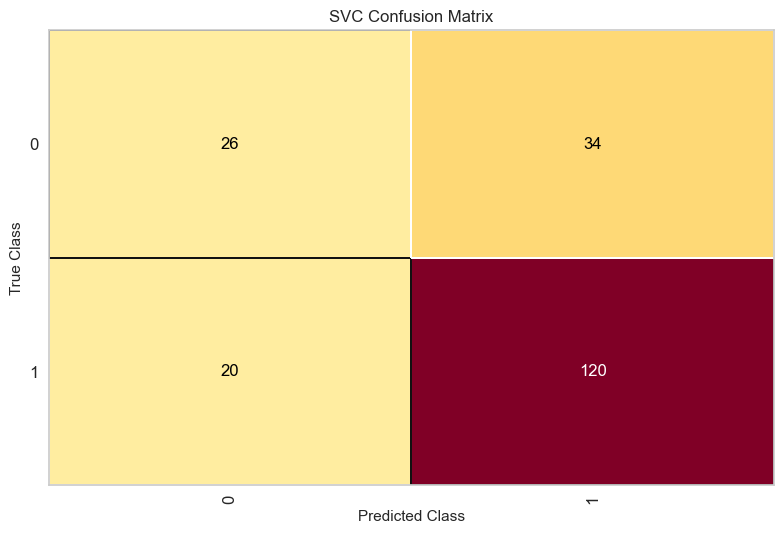

              precision    recall  f1-score   support

           0       0.57      0.43      0.49        60
           1       0.78      0.86      0.82       140

    accuracy                           0.73       200
   macro avg       0.67      0.65      0.65       200
weighted avg       0.72      0.73      0.72       200



In [28]:
print(accuracy_score(y_test, y_pred_svc))
cm = ConfusionMatrix(best_estimator)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();
print(classification_report(y_test, y_pred_svc))